In [19]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime
from scipy.stats import linregress

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = 'London'

query_url = url + 'appid=' + weather_api_key + "&q=" + city
api_url = url + 'appid=' + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = api_url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | zhuozhou
City not found. Skipping...
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | sagua de tanamo
Processing Record 6 of Set 1 | sheridan
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | vendome
Processing Record 10 of Set 1 | rio gallegos
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | sola
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | igarka
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | tiarei
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | deputatskiy
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 1 | port elizabeth
Processing R

Processing Record 37 of Set 4 | pevek
Processing Record 38 of Set 4 | dingle
Processing Record 39 of Set 4 | ginir
Processing Record 40 of Set 4 | lorengau
Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | pak chong
Processing Record 43 of Set 4 | bethel
Processing Record 44 of Set 4 | port lincoln
Processing Record 45 of Set 4 | rorvik
Processing Record 46 of Set 4 | gurskoye
City not found. Skipping...
Processing Record 47 of Set 4 | klaksvik
Processing Record 48 of Set 4 | tuatapere
Processing Record 49 of Set 4 | weligama
Processing Record 50 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 1 of Set 5 | mazyr
Processing Record 2 of Set 5 | agucadoura
Processing Record 3 of Set 5 | samusu
City not found. Skipping...
Processing Record 4 of Set 5 | geraldton
Processing Record 5 of Set 5 | bambous virieux
Processing Record 6 of Set 5 | dandong
Processing Record 7 of Set 5 | jian
Processing Record 8 of Set 5 | saint-philippe
Proc

Processing Record 32 of Set 8 | lompoc
Processing Record 33 of Set 8 | ferme-neuve
Processing Record 34 of Set 8 | santiago del estero
Processing Record 35 of Set 8 | neuquen
Processing Record 36 of Set 8 | mehamn
Processing Record 37 of Set 8 | columbia
Processing Record 38 of Set 8 | curaca
Processing Record 39 of Set 8 | vallenar
Processing Record 40 of Set 8 | zemio
Processing Record 41 of Set 8 | mahebourg
Processing Record 42 of Set 8 | mormugao
Processing Record 43 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 44 of Set 8 | coquimbo
Processing Record 45 of Set 8 | stornoway
Processing Record 46 of Set 8 | comodoro rivadavia
Processing Record 47 of Set 8 | menongue
Processing Record 48 of Set 8 | guerrero negro
Processing Record 49 of Set 8 | jacmel
Processing Record 50 of Set 8 | porto novo
Processing Record 1 of Set 9 | wittstock
Processing Record 2 of Set 9 | fairbanks
Processing Record 3 of Set 9 | kanniyakumari
Processing Record 4 of Set 9 | luanda
Processing Record

Processing Record 21 of Set 12 | pori
Processing Record 22 of Set 12 | wau
Processing Record 23 of Set 12 | detchino
Processing Record 24 of Set 12 | vuktyl
Processing Record 25 of Set 12 | antofagasta
Processing Record 26 of Set 12 | yinchuan
Processing Record 27 of Set 12 | vestmannaeyjar
Processing Record 28 of Set 12 | betare oya
Processing Record 29 of Set 12 | silver city
Processing Record 30 of Set 12 | hulan
Processing Record 31 of Set 12 | omboue
Processing Record 32 of Set 12 | havoysund
Processing Record 33 of Set 12 | vestmanna
Processing Record 34 of Set 12 | ezerelis
Processing Record 35 of Set 12 | san juan
Processing Record 36 of Set 12 | praia da vitoria
Processing Record 37 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 38 of Set 12 | arman
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,298.13,70,100,7.94,PF,2022-04-30 00:38:12
1,Faanui,-16.4833,-151.7500,300.38,73,18,7.63,PF,2022-04-30 00:38:12
2,Severo-Kurilsk,50.6789,156.1250,275.34,88,77,4.24,RU,2022-04-30 00:38:13
3,Sagua De Tanamo,20.5819,-75.2414,297.04,76,100,2.90,CU,2022-04-30 00:38:13
4,Sheridan,44.8333,-106.9173,278.36,79,100,12.35,US,2022-04-30 00:38:14
5,Saskylakh,71.9167,114.0833,274.17,100,100,3.82,RU,2022-04-30 00:38:14
6,Carnarvon,-24.8667,113.6333,293.19,49,0,6.69,AU,2022-04-30 00:38:15
7,Vendome,47.8000,1.0667,284.31,90,82,3.57,FR,2022-04-30 00:38:15
8,Rio Gallegos,-51.6226,-69.2181,275.18,80,0,1.54,AR,2022-04-30 00:37:59
9,Khatanga,71.9667,102.5000,264.50,92,95,6.60,RU,2022-04-30 00:38:16


In [9]:
len(city_data_df)

547

In [10]:
city_data_df = city_data_df[['City', 'Country', 'Lat', 'Lng', 'Max Temp', 'Humidity',
                                  'Cloudiness', 'Wind Speed', 'Date']]
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Rikitea,PF,-23.1203,-134.9692,298.13,70,100,7.94,2022-04-30 00:38:12
1,Faanui,PF,-16.4833,-151.7500,300.38,73,18,7.63,2022-04-30 00:38:12
2,Severo-Kurilsk,RU,50.6789,156.1250,275.34,88,77,4.24,2022-04-30 00:38:13
3,Sagua De Tanamo,CU,20.5819,-75.2414,297.04,76,100,2.90,2022-04-30 00:38:13
4,Sheridan,US,44.8333,-106.9173,278.36,79,100,12.35,2022-04-30 00:38:14
5,Saskylakh,RU,71.9167,114.0833,274.17,100,100,3.82,2022-04-30 00:38:14
6,Carnarvon,AU,-24.8667,113.6333,293.19,49,0,6.69,2022-04-30 00:38:15
7,Vendome,FR,47.8000,1.0667,284.31,90,82,3.57,2022-04-30 00:38:15
8,Rio Gallegos,AR,-51.6226,-69.2181,275.18,80,0,1.54,2022-04-30 00:37:59
9,Khatanga,RU,71.9667,102.5000,264.50,92,95,6.60,2022-04-30 00:38:16


In [11]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# Part 2..

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

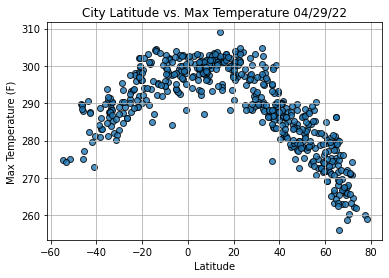

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

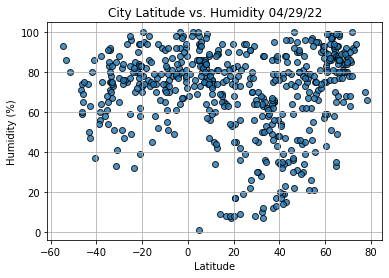

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

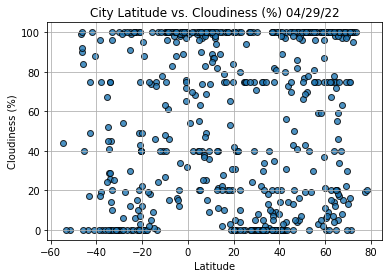

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

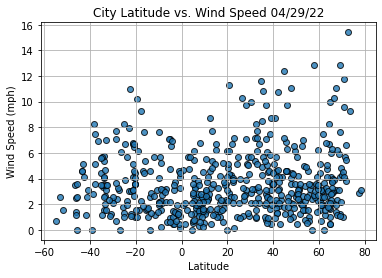

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [81]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r",label=line_eq)
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.legend(loc='upper right')
    plt.show()
   

In [69]:
index13 = city_data_df.loc[13]
index13 

City                     Hermanus
Country                        ZA
Lat                      -34.4187
Lng                       19.2345
Max Temp                   287.63
Humidity                       83
Cloudiness                     41
Wind Speed                   3.34
Date          2022-04-30 00:38:17
Name: 13, dtype: object

In [70]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
542     True
543     True
544    False
545     True
546     True
Name: Lat, Length: 547, dtype: bool

In [71]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
2,Severo-Kurilsk,RU,50.6789,156.1250,275.34,88,77,4.24,2022-04-30 00:38:13
3,Sagua De Tanamo,CU,20.5819,-75.2414,297.04,76,100,2.90,2022-04-30 00:38:13
4,Sheridan,US,44.8333,-106.9173,278.36,79,100,12.35,2022-04-30 00:38:14
5,Saskylakh,RU,71.9167,114.0833,274.17,100,100,3.82,2022-04-30 00:38:14
7,Vendome,FR,47.8000,1.0667,284.31,90,82,3.57,2022-04-30 00:38:15


In [72]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

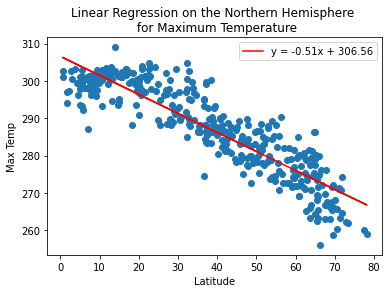

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

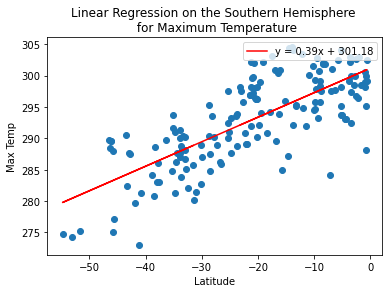

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))
                        

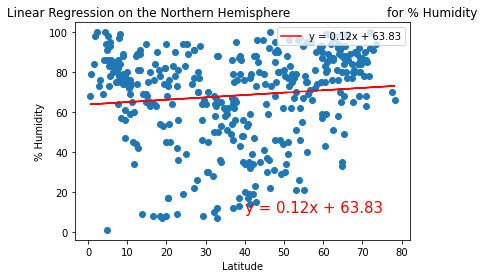

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

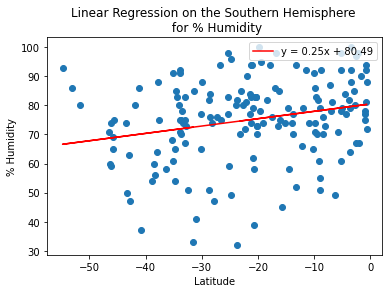

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

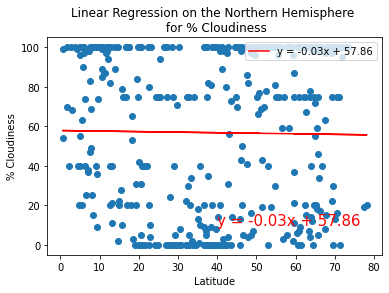

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

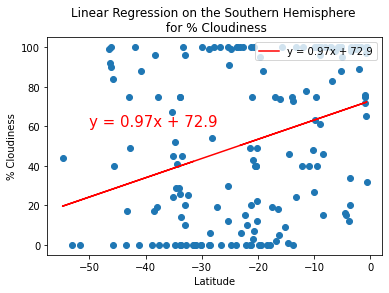

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

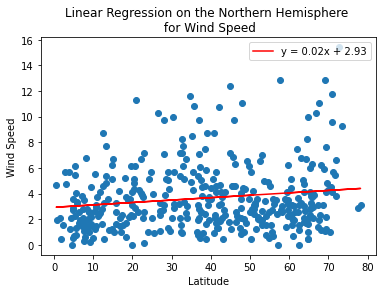

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

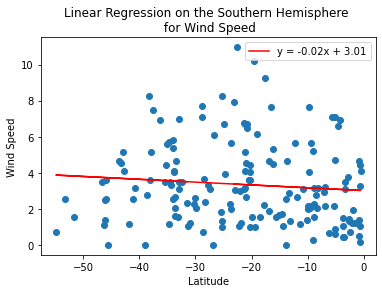

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))